/var/folders/7w/vtyftm5n3yg45b1tg1451xn40000gn/T/ipykernel_20560/4090216009.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_stock_price


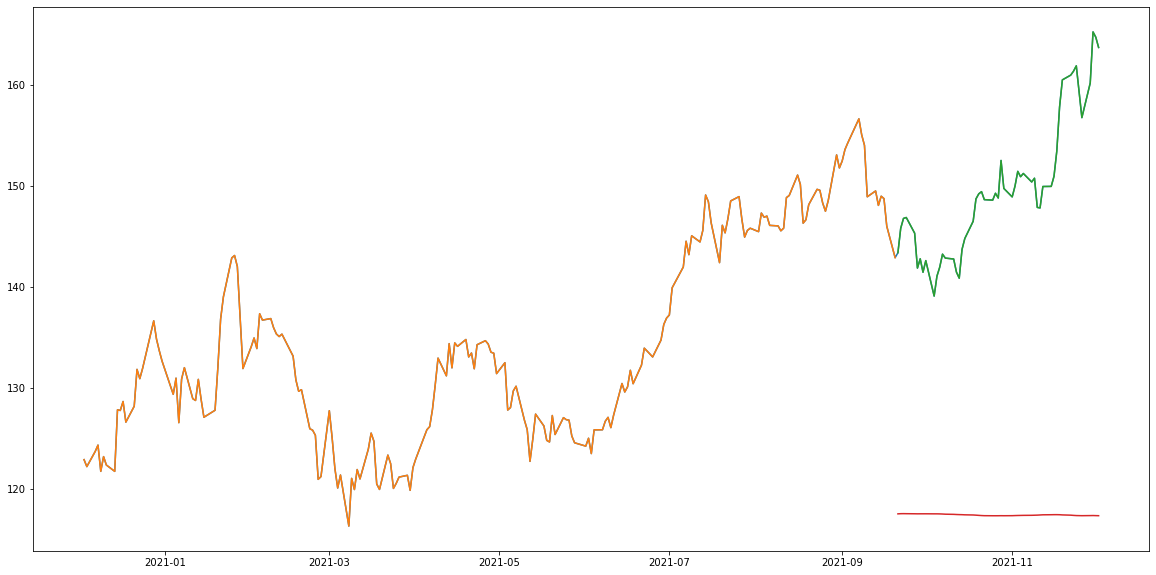

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

import os
working_directory = os.getcwd()

path = working_directory + '/Desktop/Artificial Intelligence/Apple Stock Practice/aapl_stock_1month.csv'
df_1month = pd.read_csv(path)


path1 = working_directory + '/Desktop/Artificial Intelligence/Apple Stock Practice/aapl_stock_1yr.csv'
df_1yr = pd.read_csv(path1)


df_1yr = df_1yr[['Date', 'Close/Last']]

df_1yr = df_1yr.replace({'\$':''}, regex = True)


df_1yr = df_1yr.astype({"Close/Last": float})
df_1yr["Date"] = pd.to_datetime(df_1yr.Date, format="%m/%d/%Y")


df_1yr.index = df_1yr['Date']


#plt.plot(df_1yr["Close/Last"],label='Close Price history')


df_1yr = df_1yr.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df_1yr)),columns=['Date','Close/Last'])
for i in range(0,len(data)):
    data["Date"][i]=df_1yr['Date'][i]
    data["Close/Last"][i]=df_1yr["Close/Last"][i]


scaler = MinMaxScaler(feature_range=(0,1))

data.index = data.Date
data.drop('Date',axis=1,inplace=True)

final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]

scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
#lstm_model.fit(x_train_data, y_train_data, epochs = 1, batch_size = 1, verbose = 2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close/Last"])
plt.plot(valid_data[['Close/Last',"Predictions"]])